# PLOTTING WITH SEABORN

## Introduction to Seaborn

Seaborn is a Python data visualization library that provides simple code to create elegant visualizations for statistical exploration and insight. Seaborn is based on Matplotlib, but improves on Matplotlib in several ways:

* Seaborn provides a more visually appealing plotting style and concise syntax.
* Seaborn natively understands Pandas DataFrames, making it easier to plot data directly from CSVs.
* Seaborn can easily summarize Pandas DataFrames with many rows of data into aggregated charts.

## Using Pandas For Seaborn

Throughout this lesson, you’ll use Seaborn to visualize a Pandas DataFrame.

DataFrames contain data structured into rows and columns. DataFrames look similar to other data tables you may be familiar with, but they are designed specifically to be used with Python.

You can create a DataFrame from a local CSV file (CSV files store data in a tabular format).

To create a DataFrame from a local CSV file you would use the syntax:

__df = pd.read_csv('file_name.csv')__

The code above creates a DataFrame saved to a variable named df. The data inside of the df DataFrame comes from the data in the local CSV file named file_name.csv.

Once you have prepared and organized a Pandas DataFrame with your chosen dataset, you are ready to plot with Seaborn!

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Plotting Bars with Seaborn

Take a look at the file called results.csv. You’ll plot that data soon, but before you plot it, take a minute to understand the context behind that data, which is based on a hypothetical situation we have created:

Suppose we are analyzing data from a survey: we asked 1,000 patients at a hospital how satisfied they were with their experience. Their response was measured on a scale of 1 - 10, with 1 being extremely unsatisfied, and 10 being extremely satisfied. We have summarized that data in a CSV file called results.csv.

To plot this data using Matplotlib, you would write the following:

__df = pd.read_csv("results.csv")__

__ax = plt.subplot()__

__plt.bar(range(len(df)),df["Mean Satisfaction"])__

__ax.set_xticks(range(len(df)))__

__ax.set_xticklabels(df.Gender)__

__plt.xlabel("Gender")__

__plt.ylabel("Mean Satisfaction")__

That's a lot of work for a simple bar chart! Seaborn gives us a much simpler option. With Seaborn, you can use the __sns.barplot()__ command to do the same thing.

The Seaborn function __sns.barplot()__, takes at least three keyword arguments:

* __data__: a Pandas DataFrame that contains the data (in this example, data=df)
* __x__: a string that tells Seaborn which column in the DataFrame contains otheur x-labels (in this case, x="Gender")
* __y__: a string that tells Seaborn which column in the DataFrame contains the heights we want to plot for each bar (in this case y="Mean Satisfaction")

       Gender  Mean Satisfaction
0        Male                7.2
1      Female                8.1
2  Non-binary                6.8


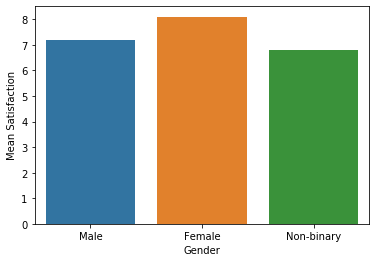

In [4]:
df = pd.read_csv('results.csv')
print(df)

sns.barplot(data=df,x= "Gender", y= "Mean Satisfaction")
plt.show()

## Understanding Aggregates

Seaborn can also calculate aggregate statistics for large datasets. To understand why this is helpful, we must first understand what an aggregate is.

An aggregate statistic, or aggregate, is a single number used to describe a set of data. One example of an aggregate is the average, or mean of a data set. There are many other aggregate statistics as well.

Suppose we have a grade book with columns student, assignment_name, and grade, as shown below.

<img src="table1.jpeg" title="gradebook" width="300" height="200" />

To calculate a student’s current grade in the class, we need to aggregate the grade data by student. To do this, we’ll calculate the average of each student’s grades, resulting in the following data set:

<img src="table2.jpeg" title="gradebook_avg" width="300" height="200" />

On the other hand, we may be interested in understanding the relative difficulty of each assignment. In this case, we would aggregate by assignment, taking the average of all student’s scores on each assignment:

<img src="table3.jpeg" title="students_avg" width="300" height="200" />

In both of these cases, the function we used to aggregate our data was the average or mean, but there are many types of aggregate statistics including:

* Median
* Mode
* Standard Deviation

In Python, you can compute aggregates fairly quickly and easily using Numpy, a popular Python library for computing. You’ll use Numpy in this exercise to compute aggregates for a DataFrame.

In [7]:
gradebook = pd.read_csv("gradebook.csv")
print(gradebook)
assignment1 = gradebook[gradebook.assignment_name == 'Assignment 1']
print(assignment1)
asn1_median = np.median(assignment1.grade)
print(asn1_median)

  student assignment_name  grade
0     Amy    Assignment 1     75
1     Amy    Assignment 2     82
2     Bob    Assignment 1     99
3     Bob    Assignment 2     90
4   Chris    Assignment 1     72
5   Chris    Assignment 2     66
6     Dan    Assignment 1     88
7     Dan    Assignment 2     82
8   Ellie    Assignment 1     91
9   Ellie    Assignment 2     85
  student assignment_name  grade
0     Amy    Assignment 1     75
2     Bob    Assignment 1     99
4   Chris    Assignment 1     72
6     Dan    Assignment 1     88
8   Ellie    Assignment 1     91
88.0


## Plotting Aggregates

Recall our gradebook from the previous exercise:

<img src="table1.jpeg" title="gradebook" width="300" height="200" />

Suppose this data is stored in a Pandas DataFrame called __df__.

The same Seaborn command that you previously learned (__sns.barplot()__) will plot this data in a bar plot and automatically aggregate the data:

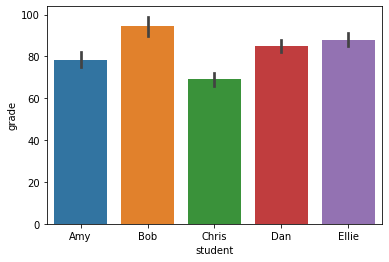

In [9]:
sns.barplot(data=gradebook, x="student", y="grade")
plt.show()

Or to plot the average grade for each assignment:

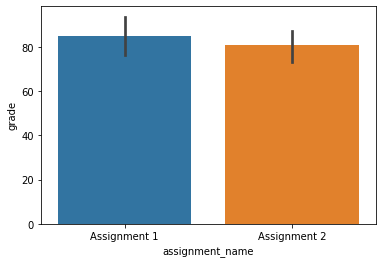

In [10]:
sns.barplot(data=gradebook,x="assignment_name",y="grade")
plt.show()

## Modifying Error Bars

By default, Seaborn will place error bars on each bar when you use the __barplot()__ function.

Error bars are the small lines that extend above and below the top of each bar. Errors bars visually indicate the range of values that might be expected for that bar.

For example, in our assignment average example, an error bar might indicate what grade we expect an average student to receive on this assignment.

There are several different calculations that are commonly used to determine error bars.

By default, Seaborn uses something called a bootstrapped confidence interval. Roughly speaking, this interval means that “based on this data, 95% of similar situations would have an outcome within this range”.

In our gradebook example, the confidence interval for the assignments means “if we gave this assignment to many, many students, we’re confident that the mean score on the assignment would be within the range represented by the error bar”.

The confidence interval is a nice error bar measurement because it is defined for different types of aggregate functions, such as medians and mode, in addition to means.

If you’re calculating a mean and would prefer to use standard deviation for your error bars, you can pass in the keyword argument __ci="sd"__ to __sns.barplot()__ which will represent one standard deviation. It would look like this:

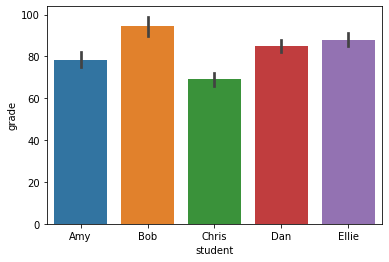

In [12]:
sns.barplot(data=gradebook, x="student", y="grade", ci="sd")
plt.show()

## Calculating Different Aggregates

In most cases, we’ll want to plot the mean of our data, but sometimes, we’ll want something different:

* If our data has many outliers, we may want to plot the median.
* If our data is categorical, we might want to count how many times each category appears (such as in the case of survey responses).

Seaborn is flexible and can calculate any aggregate you want. To do so, you’ll need to use the keyword argument estimator, which accepts any function that works on a list.

For example, to calculate the median, you can pass in __np.median__ to the __estimator__ keyword:

   Patient ID  Gender Age Range  Response
0        3951  Female   18 - 25         3
1         889    Male   18 - 25         5
2        2115  Female   18 - 25         4
3        3314  Female   18 - 25         2
4        5407    Male   18 - 25         6


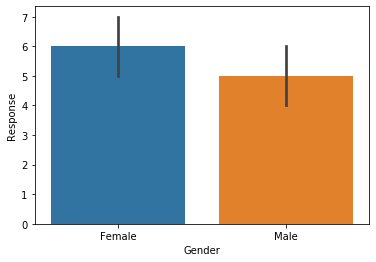

In [14]:
df = pd.read_csv("survey.csv")
print(df.head())
sns.barplot(data=df,x="Gender",y="Response",estimator=np.median)

plt.show()

## Aggregating by Multiple Columns

Sometimes we’ll want to aggregate our data by multiple columns to visualize nested categorical variables.

For example, consider our hospital survey data. The mean satisfaction seems to depend on Gender, but it might also depend on another column: Age Range.

We can compare both the Gender and Age Range factors at once by using the keyword hue.

__sns.barplot(data=df,x="Gender",y="Response",hue="Age Range")__

The hue parameter adds a nested categorical variable to the plot.

<img src="table4.jpeg" alt="graphic" title="hue" width=400 height=400 />

*Visualizing survey results by gender with age range nested*.

Notice that we keep the same x-labels, but we now have different color bars representing each __Age Range__. We can compare two bars of the same color to see how patients with the same __Age Range__, but different __Gender__ rated the survey.

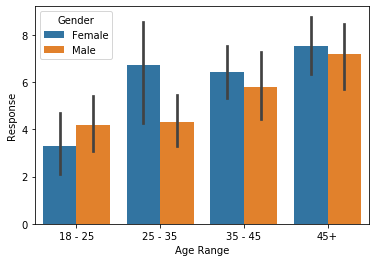

In [15]:
sns.barplot(data=df, x="Age Range", y="Response", hue="Gender")
plt.show()

# Plotting Distributions with Seaborn

Seaborn's strength is in visualizing statistical calculations. Seaborn includes several plots that allow you to graph univariate distribution, including KDE plots, box plots, and violin plots.

## Bar Charts Hide Information

Before we dive into these new charts, we need to understand why we’d want to use them. To best illustrate this idea, we need to revisit bar charts.

We previously learned that Seaborn can quickly aggregate data to plot bar charts using the mean.

Here is a bar chart that uses three different randomly generated sets of data:

<img src="table5.jpeg" alt="graphic" title="hue" width=400 height=400 />

These three datasets look identical! As far as we can tell, they each have the same mean and similar confidence intervals.

We can get a lot of information from these bar charts, but we can’t get everything. For example, what are the minimum and maximum values of these datasets? How spread out is this data?

While we may not see this information in our bar chart, these differences might be significant and worth understanding better.

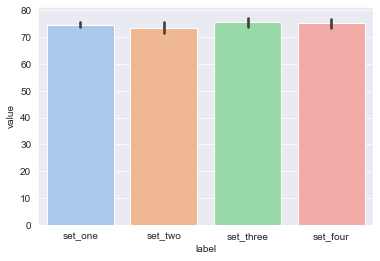

In [17]:
# Take in the data from the CSVs as NumPy arrays:
set_one = np.genfromtxt("dataset1.csv", delimiter=",")
set_two = np.genfromtxt("dataset2.csv", delimiter=",")
set_three = np.genfromtxt("dataset3.csv", delimiter=",")
set_four = np.genfromtxt("dataset4.csv", delimiter=",")

# Creating a Pandas DataFrame:
n=500
df = pd.DataFrame({"label": ["set_one"] * n + ["set_two"] * n + ["set_three"] * n + ["set_four"] * n,"value": np.concatenate([set_one, set_two, set_three, set_four])})

# Setting styles:
sns.set_style("darkgrid")
sns.set_palette("pastel")

# Graphs:
sns.barplot(data=df,x="label",y="value")
plt.show()

## KDE Plots

Bar plots can tell us what the mean of our dataset is, but they don’t give us any hints as to the distribution of the dataset values. For all we know, the data could be clustered around the mean or spread out evenly across the entire range.

To find out more about each of these datasets, we’ll need to examine their distributions. A common way of doing so is by plotting the data as a histogram, but histograms have their drawback as well.

Seaborn offers another option for graphing distributions: *KDE Plots*.

KDE stands for Kernel Density Estimator. A KDE plot gives us the sense of a univariate as a curve. A univariate dataset only has one variable and is also referred to as being one-dimensional, as opposed to bivariate or two-dimensional datasets which have two variables.

KDE plots are preferable to histograms because depending on how you group the data into bins and the width of the bins, you can draw wildly different conclusions about the shape of the data. Using a KDE plot can mitigate these issues, because they smooth the datasets, allow us to generalize over the shape of our data, and aren’t beholden to specific data points.

<img src="table6.jpeg" alt="graphic" title="hue" width=400 height=400 />

To plot a KDE in Seaborn, we use the method __sns.kdeplot()__.

A KDE plot takes the following arguments:

* __data__ - the univariate dataset being visualized, like a Pandas DataFrame, Python list, or NumPy array
* __shade__ - a boolean that determines whether or not the space underneath the curve is shaded

Let’s examine the KDE plots of our three datasets:

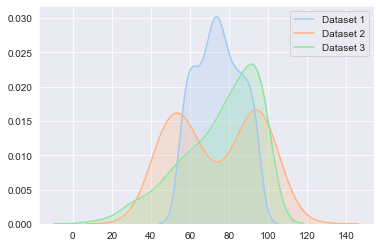

In [20]:
sns.kdeplot(set_one, shade=True, label="Dataset 1")
sns.kdeplot(set_two, shade=True, label="Dataset 2")
sns.kdeplot(set_three, shade=True, label="Dataset 3")
plt.legend()
plt.show()

Notice that when using a KDE we need to plot each of the original datasets separately, rather than using a combined dataframe like we did with the bar plot.

It looks like there are some big differences between the three datasets:

* Dataset 1 is skewed left
* Dataset 2 is normally distributed
* Dataset 3 is bimodal (it has two peaks)

So although all three datasets have roughly the same mean, the shapes of the KDE plots demonstrate the differences in how the values are distributed.

## Box Plots

While a KDE plot can tell us about the shape of the data, it’s cumbersome to compare multiple KDE plots at once. They also can’t tell us other statistical information, like the values of outliers.

The box plot (also known as a box-and-whisker plot) can tell us about how our dataset is distributed, like a KDE plot. But it shows us the range of our dataset, gives us an idea about where a significant portion of our data lies, and whether or not any outliers are present.

Let’s examine how we interpret a box plot:

* The box represents the interquartile range
* The line in the middle of the box is the median
* The end lines are the first and third quartiles
* The diamonds show outliers

<img src="table7.jpeg" title="boxplot" width=400 height=400/>

One advantage of the box plot over the KDE plot is that in Seaborn, it is easy to plot multiples and compare distributions.

Let’s look again at our three datasets, and how they look plotted as box plots:

<img src="table8.jpeg" title="boxplot" width=400 height=400/>

The box plot does a good job of showing certain differences, the different between Dataset 1 and Dataset 2; however, it does not show that Dataset 3 is bimodal.

To plot a box plot in Seaborn, we use the method __sns.boxplot()__.

A box plot takes the following arguments:

* __data__ - the dataset we’re plotting, like a DataFrame, list, or an array
* __x__ - a one-dimensional set of values, like a Series, list, or array
* __y__ - a second set of one-dimensional data

If you use a Pandas Series for the __x__ and __y__ values, the Series will also generate the axis labels. For example, if you use the value Series as your __y__ value data, Seaborn will automatically apply that name as the y-axis label.

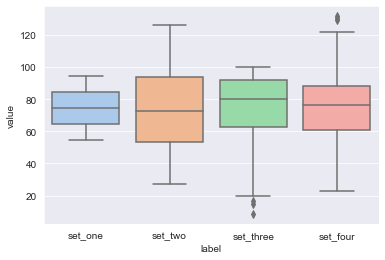

In [21]:
sns.set_style("darkgrid")
sns.set_palette("pastel")

sns.boxplot(data=df,x='label',y='value')
plt.show()

## Violin Plots

As we saw in the previous exercises, while it’s possible to plot multiple histograms, it is not a great option for comparing distributions. Seaborn gives us another option for comparing distributions - a *violin plot*. Violin plots provide more information than box plots because instead of mapping each individual data point, we get an estimation of the dataset thanks to the KDE.

Violin plots are less familiar and trickier to read, so let’s break down the different parts:

* There are two __KDE plots__ that are symmetrical along the center line.
* A __white dot__ represents the median.
* The __thick black line__ in the center of each violin represents the interquartile range.
* __The lines that extend from the center__ are the confidence intervals - just as we saw on the bar plots, a violin plot also displays the 95% confidence interval.

<img src="table9.jpeg" title="boxplot" width=400 height=400/>

Let’s look at how our original four data sets look like as violin plots:

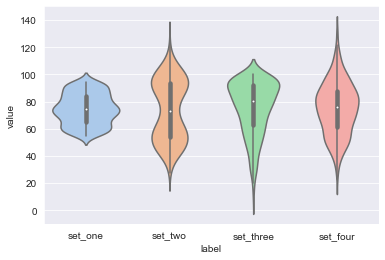

In [22]:
sns.violinplot(data=df, x="label", y="value")
plt.show()

As we can see, violin plots allow us to graph and compare multiple distributions. It also retains the shape of the distributions.

To plot a violin plot in Seaborn, use the method __sns.violinplot()__.

There are several options for passing in relevant data to the x and y parameters:

* __data__ - the dataset that we’re plotting, such as a list, DataFrame, or array
* __x, y, and hue__ - a one-dimensional set of data, such as a Series, list, or array
* any of the parameters to the function __sns.boxplot()__

## Review

Seaborn has several plots that can visualize distributions. While bar plots can display basic aggregates, KDE plots, dist plots, box plots, and violin plots can show us distributions and other information.

* __KDE plot__ - Kernel density estimator; shows a smoothed version of dataset. Use sns.kdeplot().
* __Box plot__ - A classic statistical model that shows the median, interquartile range, and outliers. Use sns.boxplot().
* __Violin plot__ - A combination of a KDE and a box plot. Good for showing multiple distributions at a time. Use __sns.violinplot()__.